Lab Cleaning numerical data

In [101]:
# # Lab | Cleaning numerical data

# For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder.

# ## Context

# An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

# **Some business Objectives**:

# - Retain customers,
# - Analyze relevant customer data,
# - Develop focused customer retention programs.

# Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

# ### Instructions

# 1. Import the necessary libraries.
# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
# 3. First look at its main features (head, shape, info).
# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
# 5. Change effective to date column to datetime format.
# 6. Define a function that differentiates between continuous and discrete variables. 
#   Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df
# 7. Plot a correlation matrix, comment what you see.
# 8. Create a function to plot every discrete variable.  Do the same with the continuous variables 
#   (Be Careful, you may need to change the plot type to one better suited for continuous data!)
# 9. Comment what you can see in the plots.
# 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
# 11. Did you find outliers?  Comment what you will do with them.
# 12. Check all columns for NaN values.  Decide what (if anything) you will need to do with them.

In [102]:
# 1.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [103]:
# 2.
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [104]:
# 4. 
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [105]:
# 5.
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

In [106]:
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [107]:

df_num = data.select_dtypes(np.number)


In [108]:
def cont(df):

    disc_df = df_num.select_dtypes('int')
    cont_df = df.select_dtypes('float')

    disc_list = []
    cont_list = []
    
    for col in df:
        
        if (df[col].nunique() < (df_num['income'].nunique()/10)) & (df[col].dtypes == 'int64'):
            disc_list.append(col)
        
        else:
            cont_list.append(col)
    
    
    disc_df = pd.DataFrame(df_num[disc_list])
    cont_df = pd.DataFrame(df_num[cont_list]) 
                    

    return disc_df, cont_df

In [109]:
disc_cust, cont_cust = cont(df_num)

In [110]:
disc_cust

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


In [111]:
cont_cust

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [112]:
# 7.
correlations_matrix = df_num.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


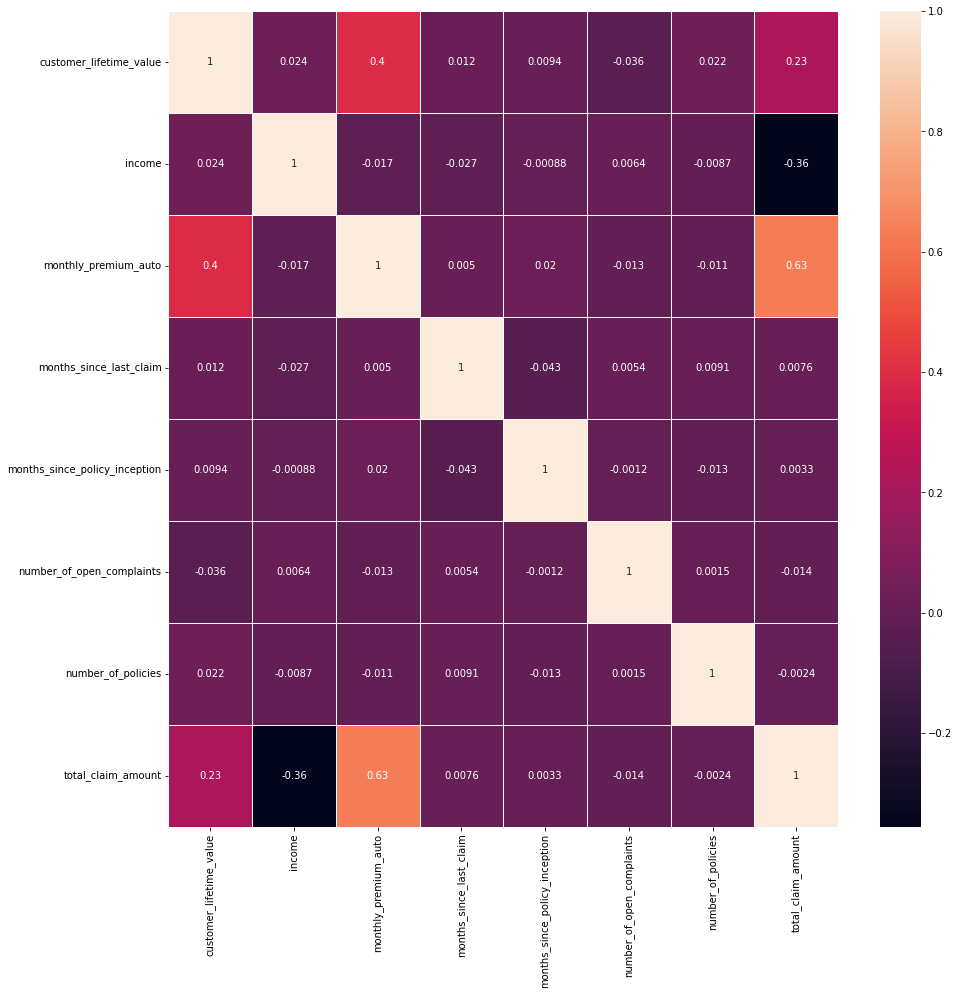

In [113]:
correlations_matrix = df_num.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

# high correlation between monthly_premium_auto and total_calim_amount

In [114]:
# 8.
def plotter (df):
    for col in df:
        sns.distplot(df[col], bins=60)
        plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


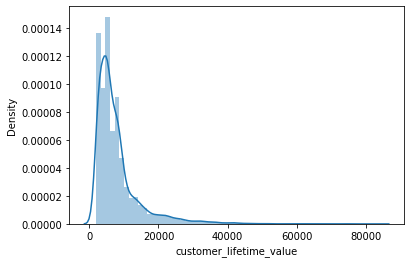

C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


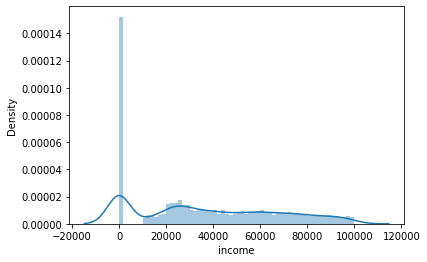

C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


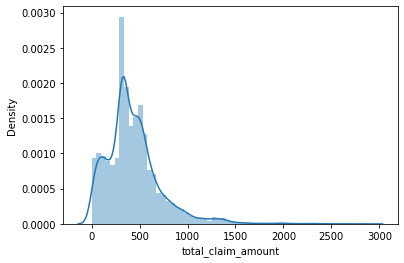

In [115]:
plotter (cont_cust)

In [116]:
def plotter2 (df):
    for col in df:
        sns.histplot(df[col], bins=60)
        plt.show()

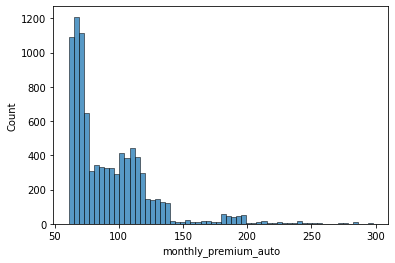

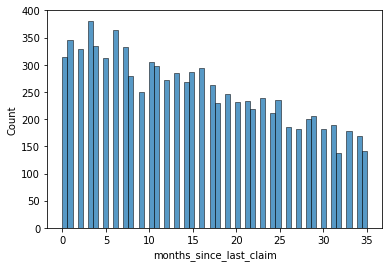

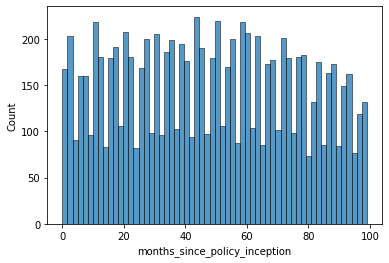

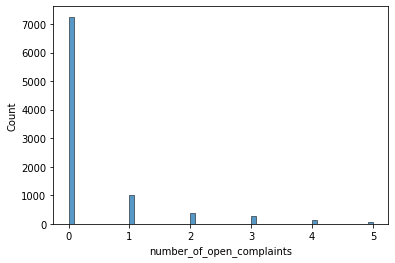

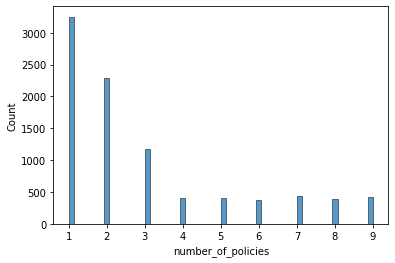

In [117]:
plotter2 (disc_cust)

In [118]:
# 9. 
# there is a high number of incomes with 0
# monthly_premium_auto, number_of_policies, number_of_open_complaints, customer_claim_amount, total_claim_amount, customer_life_time_value and income are not eaqualy distributed

In [119]:
# 10.
def plotter3 (df):
    for col in df:
        sns.boxplot(x=df[col])
        plt.show()

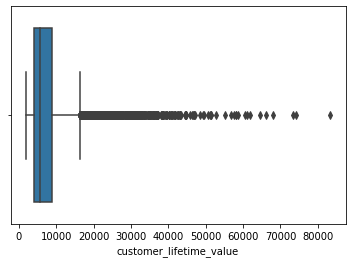

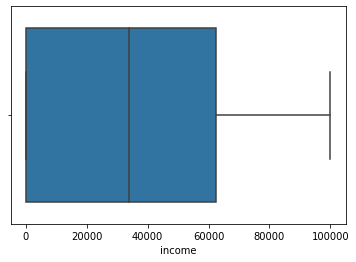

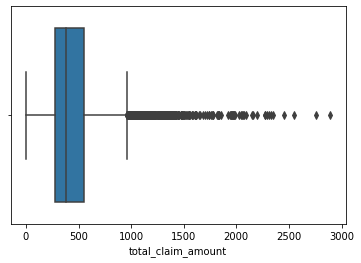

In [120]:
plotter3 (cont_cust)

In [121]:
# 11.
# There are Outliers in total_claim_amount and customer_lifetime_value. total_claim_amount is the target column so we leave it like it is.
# for the customer_lifetime_value we could build bins (5 - 10).

In [122]:
# 12.
data.isnull().sum()/len(data)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [123]:
# if there would be NaN I would use the KNeighborsClassifier als long it makes sense (for total_claim_amount for example it's not useful)

LAB Cleaning categorical data

In [124]:
# # Lab | Cleaning categorical data

# For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data.

# ### Instructions

# 1. Import the necessary libraries if you are starting a new notebook.
#   Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv
# 2. Find  all of the categorical data. Save it in a categorical_df variable.
# 3. Check for NaN values.
# 4. Check all unique values of columns.
# 5. Check dtypes. Do they all make sense as categorical data?
# 6. Does any column contain alpha and numeric data?  Decide how to clean it.
# 7. Would you choose to do anything else to clean or wrangle the categorical data?  Comment your decisions.
# 8. Compare policy_type and policy.  What information is contained in these columns.  Can you identify what is important?  
# 9. Check number of unique values in each column, can they be combined in any way to ease encoding?  Comment your thoughts and make those changes.

In [125]:
# 2.
df_cat = data.select_dtypes(include=['object', 'datetime64'])
df_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [126]:
# 3.
df_cat.isnull().sum()/len(df_cat)

customer             0.0
state                0.0
response             0.0
coverage             0.0
education            0.0
effective_to_date    0.0
employmentstatus     0.0
gender               0.0
location_code        0.0
marital_status       0.0
policy_type          0.0
policy               0.0
renew_offer_type     0.0
sales_channel        0.0
vehicle_class        0.0
vehicle_size         0.0
dtype: float64

In [127]:
# 4. 
def uniques(df):
    for col in df:
        print(df[col].unique())
uniques(df_cat)


['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['2011-02-24T00:00:00.000000000' '2011-01-31T00:00:00.000000000'
 '2011-02-19T00:00:00.000000000' '2011-01-20T00:00:00.000000000'
 '2011-02-03T00:00:00.000000000' '2011-01-25T00:00:00.000000000'
 '2011-01-18T00:00:00.000000000' '2011-01-26T00:00:00.000000000'
 '2011-02-17T00:00:00.000000000' '2011-02-21T00:00:00.000000000'
 '2011-01-06T00:00:00.000000000' '2011-02-06T00:00:00.000000000'
 '2011-01-10T00:00:00.000000000' '2011-01-17T00:00:00.000000000'
 '2011-01-05T00:00:00.000000000' '2011-02-27T00:00:00.000000000'
 '2011-01-14T00:00:00.000000000' '2011-01-21T00:00:00.000000000'
 '2011-02-05T00:00:00.000000000' '2011-01-29T00:00:00.000000000'
 '2011-02-28T00:00:00.000000000' '2011-02-12T00:00:00.000000000'
 '2011-02-02T00:00:00.000000000' '2011-02-07T00:00:00.0

In [128]:
# 5.
df_cat.dtypes

customer                     object
state                        object
response                     object
coverage                     object
education                    object
effective_to_date    datetime64[ns]
employmentstatus             object
gender                       object
location_code                object
marital_status               object
policy_type                  object
policy                       object
renew_offer_type             object
sales_channel                object
vehicle_class                object
vehicle_size                 object
dtype: object

In [129]:
# 6. alpha and numeric data = policy, renew_offer_type

df_cat['renew_offer_type'] = df_cat['renew_offer_type'].str.replace('Offer', '')
df_cat['policy'] = df_cat['policy'].str.replace('Corporate L', '')
df_cat['policy'] = df_cat['policy'].str.replace('Personal L', '')
df_cat['policy'] = df_cat['policy'].str.replace('Special L', '')

# we have the more specified information fpr policy in policy_type

In [130]:
df_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,1,2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,3,1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,2,1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,2,3,Branch,Four-Door Car,Large


In [131]:
# 7. no, nothing else to clean for now.
# customer gives us no information - kick it out
# same for effective_to_date

In [132]:
# 8. see 6.

In [133]:
# 9. see 6.

In [134]:
# 10.

In [135]:
df_cat['vehicle_class'].value_counts(dropna=False)

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [136]:
df_cat['vehicle_class'] = np.where(df_cat['vehicle_class'] == 'Luxury SUV', 'Luxury Car', df_cat['vehicle_class'])
df_cat['vehicle_class'].value_counts()


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury Car        347
Name: vehicle_class, dtype: int64

In [137]:
# ### Instructions

# 1. Open the `categoricals` variable we created before.

# ```python
# categoricals = data.select_dtypes(np.object)
# categoricals.head()
# ```

# 2. Plot all the categorical variables with the proper plot. What can you see?
# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
# 4. Plot time variable. Can you extract something from it?

In [138]:
# 1.
categoricals = df_cat.select_dtypes(np.object)
categoricals.head()

C:\Users\User\AppData\Local\Temp\ipykernel_9920\1770985517.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = df_cat.select_dtypes(np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize


In [139]:
print('Maximum value',data['total_claim_amount'].max())
print('Minimum value',data['total_claim_amount'].min())
print('Mean value',data['total_claim_amount'].mean())

Maximum value 2893.239678
Minimum value 0.099007
Mean value 434.0887943128969


In [140]:
def tca_bins(x):
    if x <=450:
        return 1
    elif x<=900:
        return 2
    elif x<=1350:
        return 3
    elif x<=1800:
        return 4
    else:
        return 5
    
data['total_claim_amount_bins'] = list(map(tca_bins, data['total_claim_amount']))

data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,total_claim_amount_bins
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,1
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,3
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,1
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [155]:
# 2.

In [146]:
categoricals = categoricals.drop(['customer'], axis=1)

In [147]:
categoricals['tcm'] = data['total_claim_amount']

In [168]:
def plot_cat2 (df):
    for col in df:
        if (col!='tcm'):
            sns.boxplot(x=df[col], y='tcm', data=df)
            plt.show()
            sns.countplot(x=col, data = df)
            plt.show()
        else:
            break

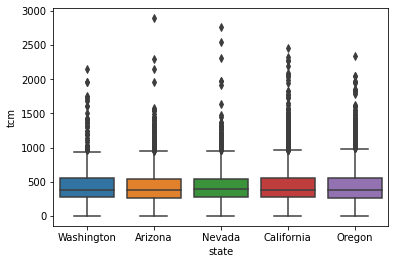

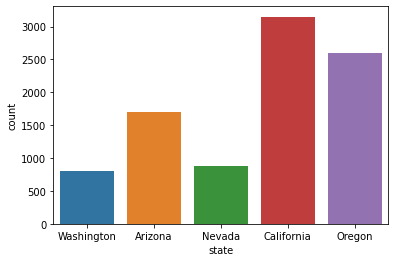

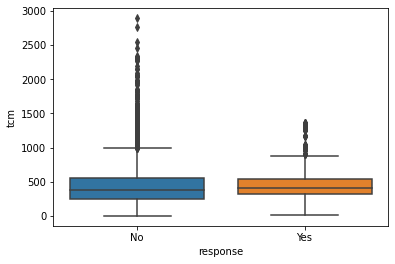

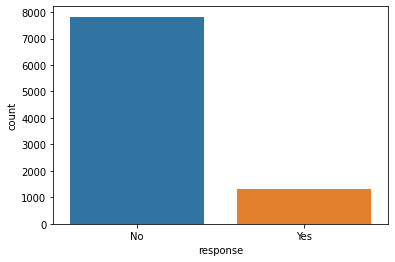

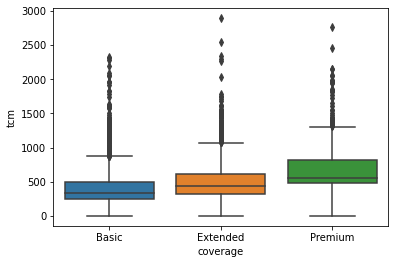

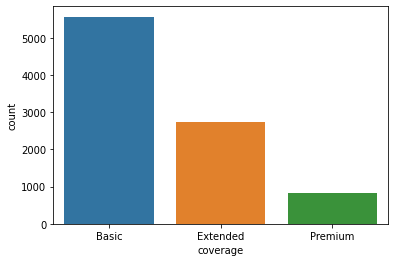

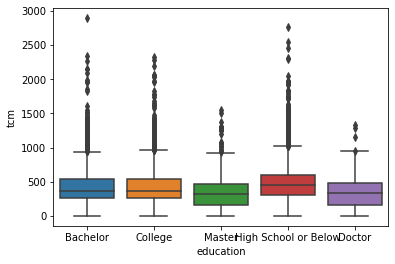

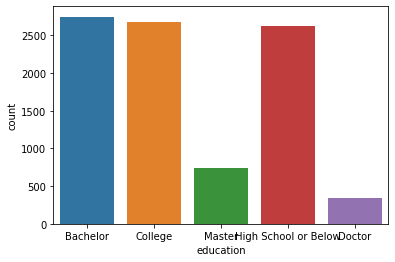

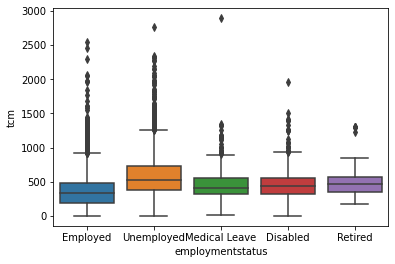

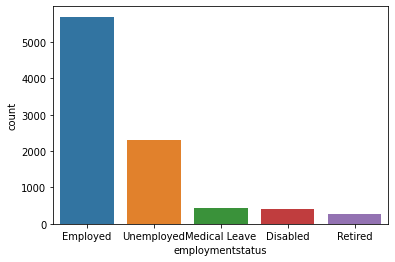

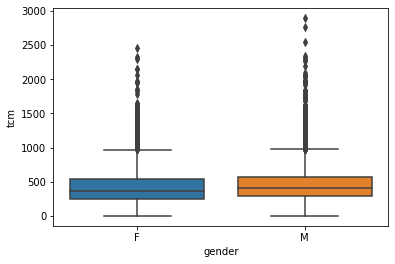

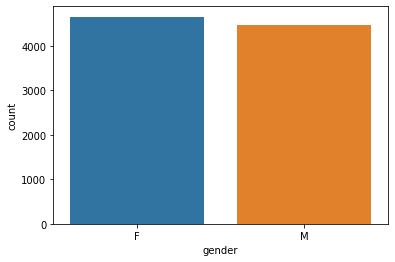

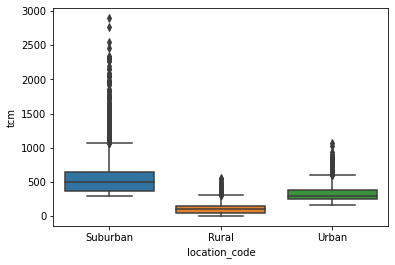

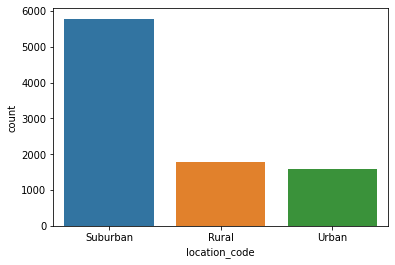

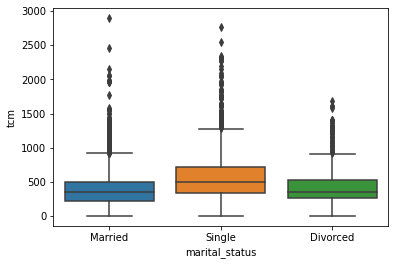

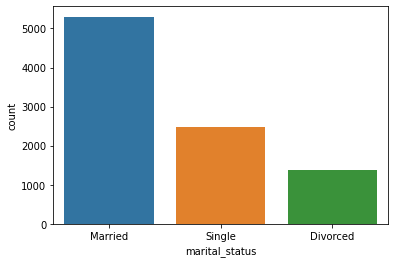

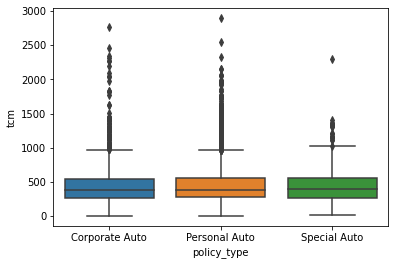

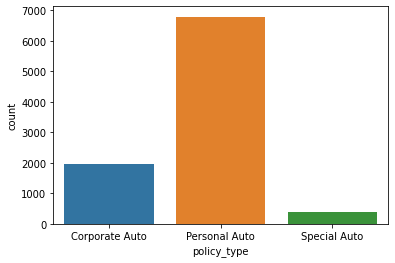

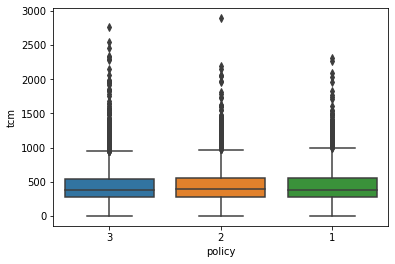

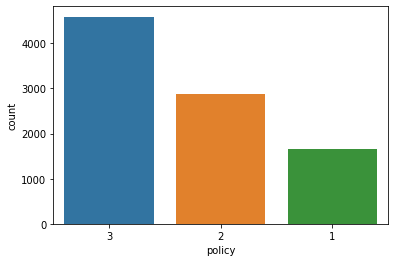

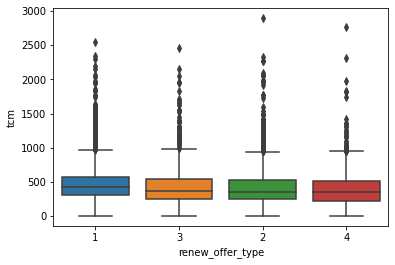

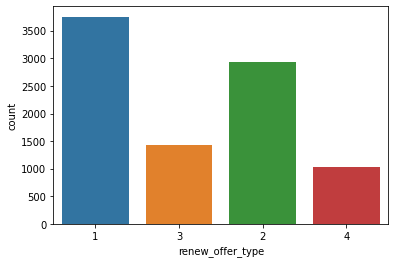

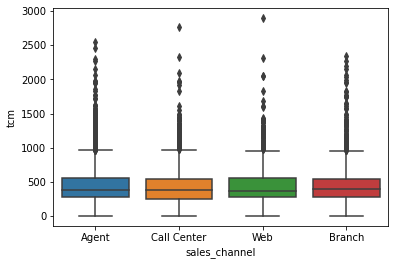

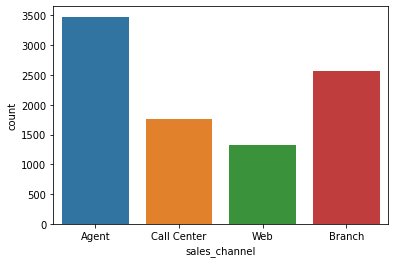

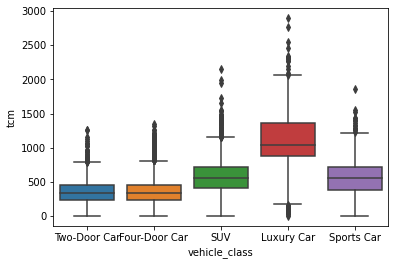

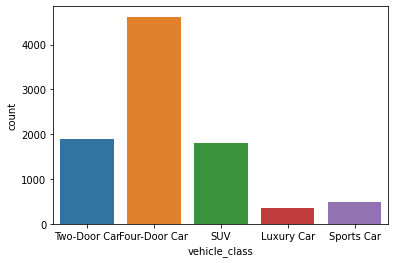

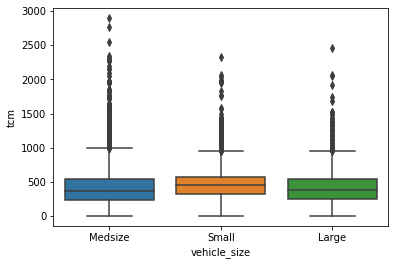

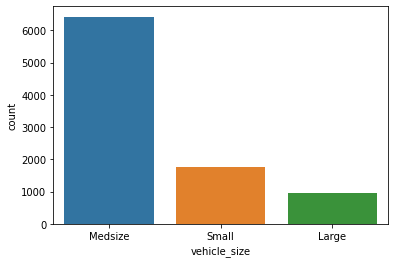

In [169]:
plot_cat2 (categoricals)

In [ ]:
# customers buy insurances for their private cars. they dont like to response to sales channels. Most customers are form California or Oregon. 
# Mediumsize is the most common car type. Most of them are from Suburban areas and are married.

In [ ]:
# 3.
#drop the column 'customer' each value per row is unique. we dont need it, becaucse its independent to the other columns
#effective_to_date can also be dropped beacuse of the same reason

In [158]:
# 4. Plot time variable. Can you extract something from it?
df_cat['tcm'] = data['total_claim_amount']

In [170]:
df_cat['month'] = pd.DatetimeIndex(df_cat['effective_to_date']).month

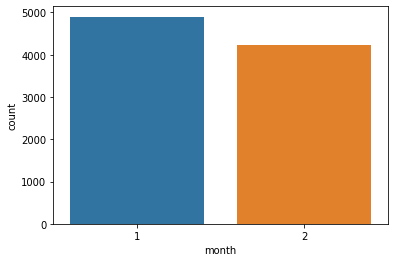

In [175]:
sns.countplot(x='month', data=df_cat)
plt.show()

In [ ]:
# We consider that effective_to_date could be the date in which the information of the customers was updated and given that 
# they are call contained in eithe January or February, we don't see a considerable relationship between this column and 
# the target value